## Jakub_Szczypek_lab3 - logistic regression

**Sprawozdanie z Uczenia Maszynowego**

## Binary logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

**Excercise 0**

In [2]:
data

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam 1    100 non-null    float64
 1   Exam 2    100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


**Excercise 1**

In [5]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

theta = np.zeros((X.shape[0]+1, 1))

X = np.concatenate([np.ones([1, X.shape[1]]), X])

for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

**Excercise 2**

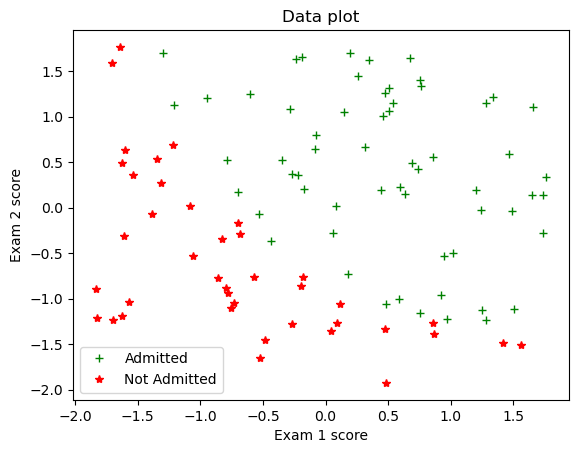

In [6]:
plt.figure()
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'g+', label = 'Admitted')
plt.plot(X1_0, X2_0, 'r*', label = 'Not Admitted')
plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 score")
plt.title("Data plot")
plt.legend()
plt.show()

**Excercise 3**

In [7]:
def sig(z):
    return 1 / (1 + np.exp(-z))

**Excercise 4**

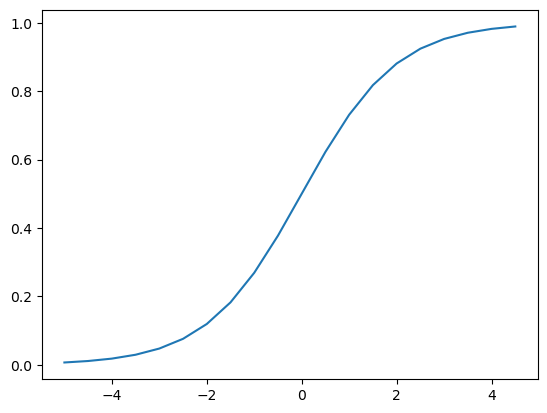

In [8]:
x = np.arange(-5, 5, 0.5)
x_sigma = sig(x)
plt.plot(x, x_sigma)

**Excercise 5**

In [9]:
def h(theta, x):
    return sig(theta.T @ x)

def computeCost(theta, X, y):
    h = sig(theta.T @ X)
    J = (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum() / X.shape[1]
    return J

theta = np.zeros((X.shape[0], 1))
J = computeCost(theta, X, y)
print(J)

0.6931471805599453


**Excercise 6**

In [10]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        h = sig(theta.T @ X)
        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost += [computeCost(theta, X, y)]

    return theta, cost

alpha = 1
it = 150
theta, cost = simple_gradient(X, y, theta, alpha, it)
print(f"theta:\n {theta}")
print(f"cost = {cost[-1]}")

theta:
 [[1.41957362]
 [3.35941597]
 [3.11271333]]
cost = 0.20640714304449775


**Excercise 7**

In [11]:
preds = np.round(sig(theta.T @ X))
correct = (preds == y).astype(int).sum()
acc = correct / X.shape[1]
print(f'accuracy = {acc}')

accuracy = 0.89


**Excercise 8**

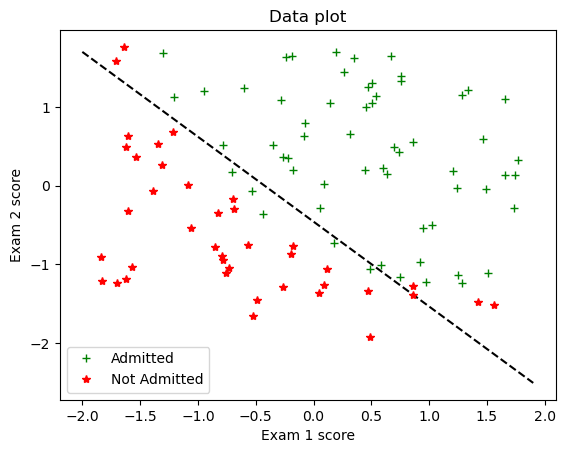

In [12]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2, 'k--')
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'g+', label = 'Admitted')
plt.plot(X1_0, X2_0, 'r*', label = 'Not Admitted')
plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 score")
plt.title("Data plot")
plt.legend()
plt.show()

## Logistic regression - Python

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error, accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

**Excercise 1 and Excercise 2**

In [14]:
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

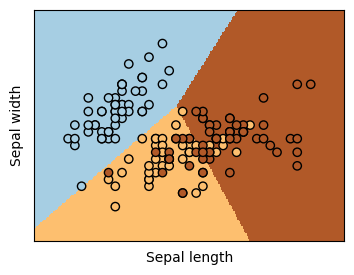

In [15]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

**Excercise 3**

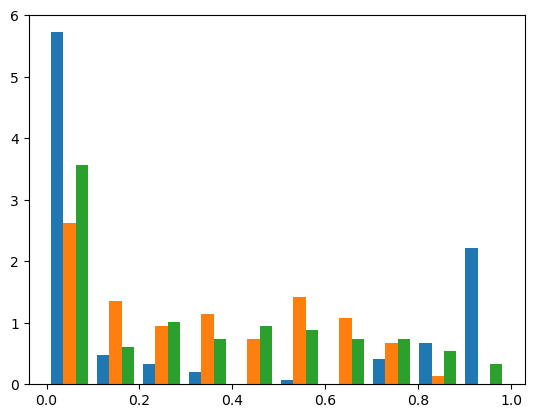

In [16]:
plt.hist(logreg.predict_proba(X), density=True)
plt.show()

**Excercise 4**

In [17]:
X_pred = logreg.predict(X)

In [18]:
print(f"Accuracy classification score = {accuracy_score(Y, X_pred)}")

Accuracy classification score = 0.82


In [19]:
print(f"Mean squared error regression loss = {mean_squared_error(Y, X_pred)}")

Mean squared error regression loss = 0.18
